## Overall Prediction Observation


In [12]:
# Define variables
IS_FILTERED = True
ARCHIVED = None

SHOW_HEADER = True
SHOW_LAST_APPEARANCE = None

In [13]:
# Import libraries
import sys
sys.path.append('../../../prediction')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from putils.observation import compute_rmse, compute_mae, compute_mape, load_data_from_tuned_folder

In [14]:
# Load data
dfs = {
    "l1": load_data_from_tuned_folder("l1", last_appearance=SHOW_LAST_APPEARANCE),
    "l2": load_data_from_tuned_folder("l2", last_appearance=SHOW_LAST_APPEARANCE),
    "l3": load_data_from_tuned_folder("l3", last_appearance=SHOW_LAST_APPEARANCE),
}

# Make L1 and L2 data have the same length with L3 if SHOW_LAST_APPEARANCE = None
if SHOW_LAST_APPEARANCE is None:
    dfs["l1"] = dfs["l1"].tail(len(dfs["l3"]))
    dfs["l2"] = dfs["l2"].tail(len(dfs["l3"]))

# Indicate which columns to ignore
IGNORED_COLS = ["Time", "Actual"] # No need to include "FormattedTime" because it is used as index
if IS_FILTERED: IGNORED_COLS.append("Raw")

L1:                              Time     ARIMA    SARIMA       ETS        GP  \
FormattedTime                                                               
02:39:20      2023-09-08 02:39:20  0.163194  0.162511  0.160432  0.164897   
02:39:25      2023-09-08 02:39:25  0.154760  0.152053  0.144265  0.162623   
02:39:30      2023-09-08 02:39:30  0.148360  0.141814  0.127706  0.166745   
02:39:35      2023-09-08 02:39:35  0.143503  0.129723  0.112419  0.171119   
02:39:40      2023-09-08 02:39:40  0.139819  0.114421  0.099374  0.168747   

                    RNN      LSTM       CNN       GRU       TCN    Actual  \
FormattedTime                                                               
02:39:20       0.156504  0.152832  0.153384  0.160395  0.175573  0.162624   
02:39:25       0.153077  0.151156  0.146197  0.153188  0.145541  0.154248   
02:39:30       0.143333  0.146130  0.132894  0.148120  0.126703  0.148889   
02:39:35       0.140257  0.148420  0.128580  0.147683  0.137833  0.1415

In [15]:
# Compute RMSE, MAE, and MAPE for each model
for key, df in dfs.items():
    print("Layer", key)
    for column in df.columns:
        if column not in IGNORED_COLS:
            actual = df["Raw"] if IS_FILTERED else df["Actual"]
            rmse = mean_squared_error(actual, df[column], squared=False)
            mape = compute_mape(actual, df[column])
            mae = compute_mae(actual, df[column])
            print(f"{column} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")
    print("------------------")

Layer l1
ARIMA - RMSE: 0.0574, MAE: 0.0461, MAPE: 38.85%
SARIMA - RMSE: 0.0653, MAE: 0.0507, MAPE: 43.78%
ETS - RMSE: 0.0726, MAE: 0.0568, MAPE: 47.49%
GP - RMSE: 0.1358, MAE: 0.0942, MAPE: 73.52%
RNN - RMSE: 0.0419, MAE: 0.0336, MAPE: 29.36%
LSTM - RMSE: 0.0435, MAE: 0.0344, MAPE: 30.01%
CNN - RMSE: 0.0450, MAE: 0.0357, MAPE: 30.94%
GRU - RMSE: 0.0433, MAE: 0.0343, MAPE: 29.98%
TCN - RMSE: 0.0483, MAE: 0.0389, MAPE: 35.69%
------------------
Layer l2
LINEAR_REGRESSION - RMSE: 0.0418, MAE: 0.0332, MAPE: 27.91%
RANDOM_FOREST - RMSE: 0.0413, MAE: 0.0331, MAPE: 29.04%
FEEDFORWARD_NEURAL_NETWORK - RMSE: 0.0416, MAE: 0.0337, MAPE: 28.96%
------------------
Layer l3
Predicted - RMSE: 0.0410, MAE: 0.0332, MAPE: 28.60%
------------------


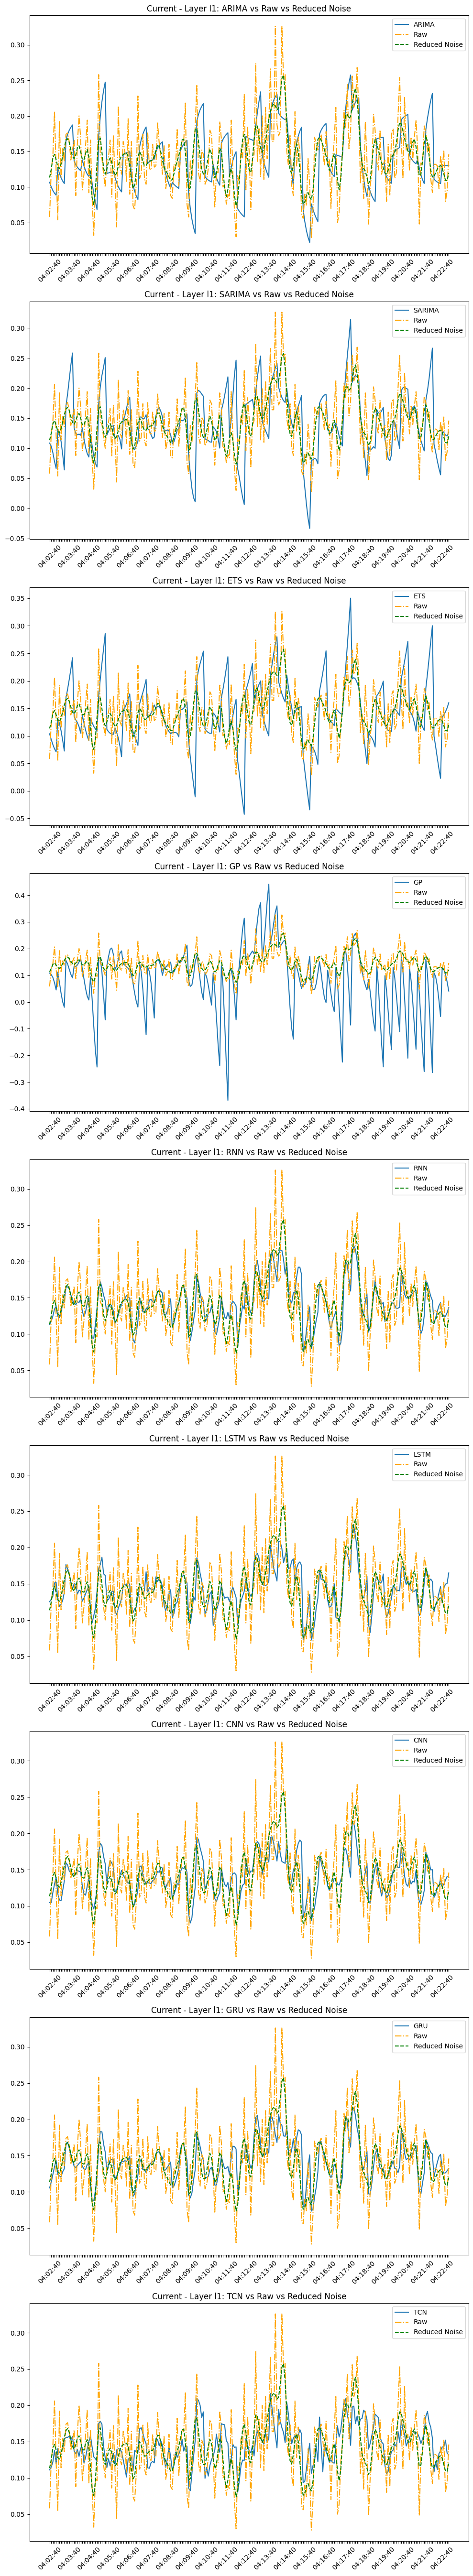

------------------


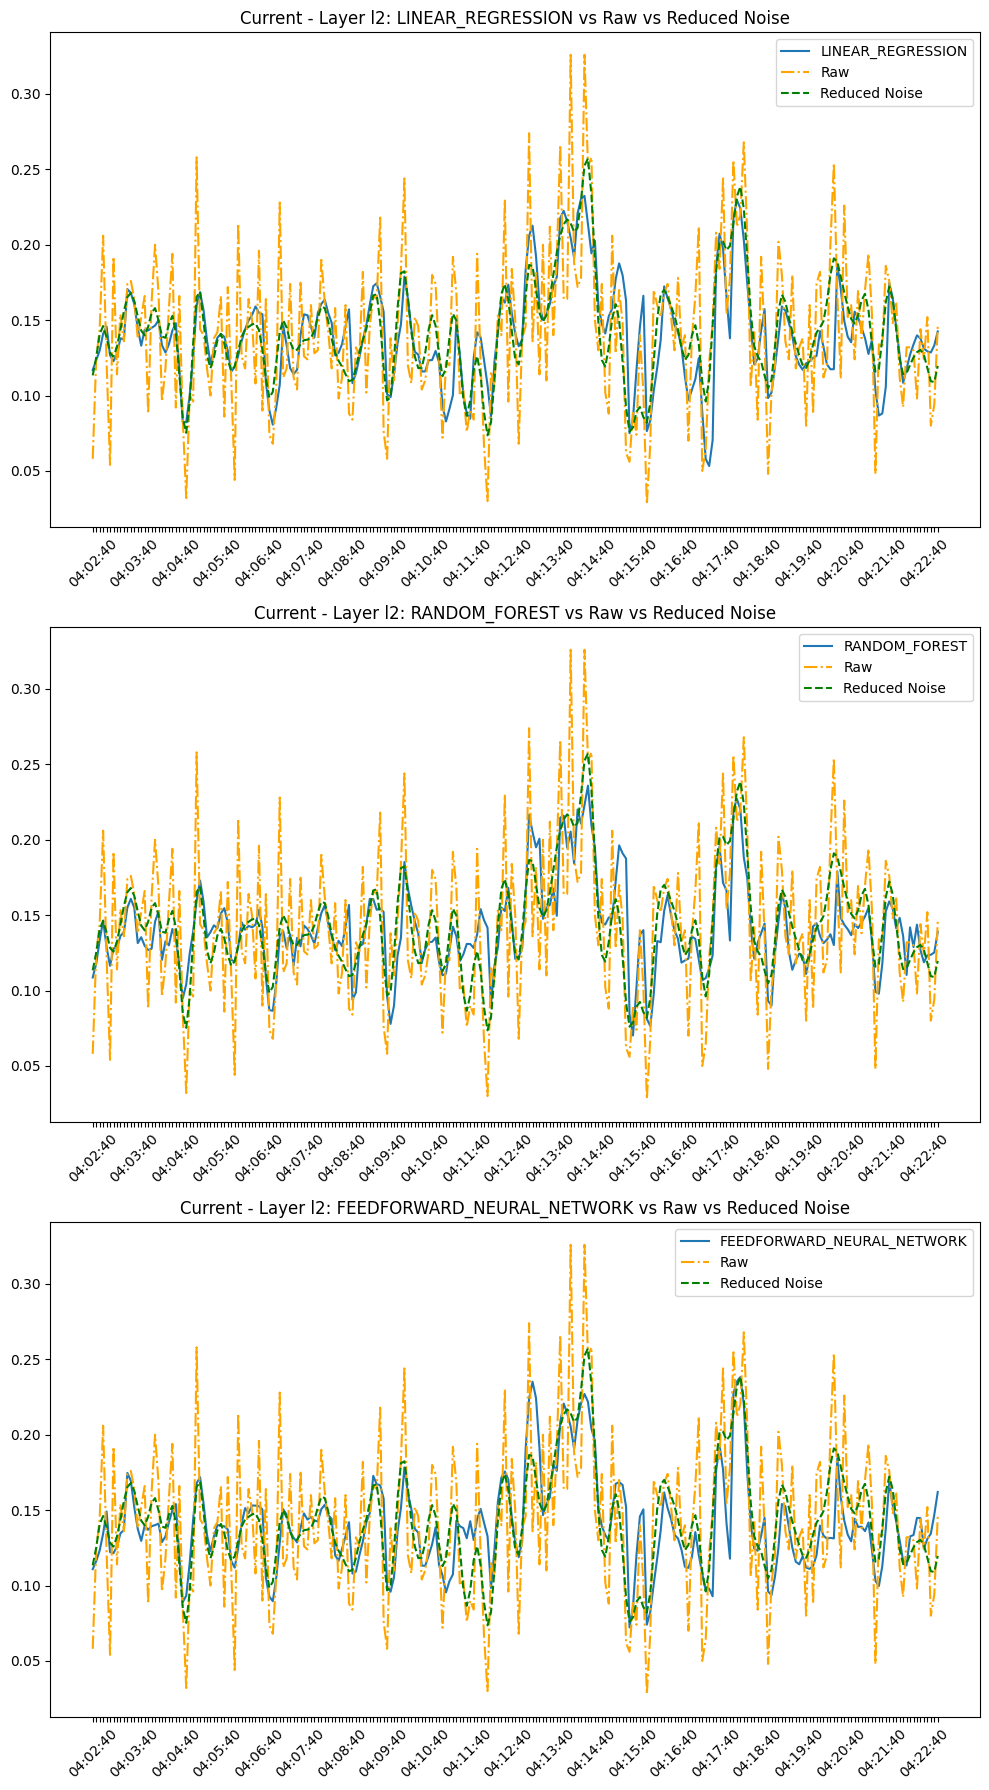

------------------


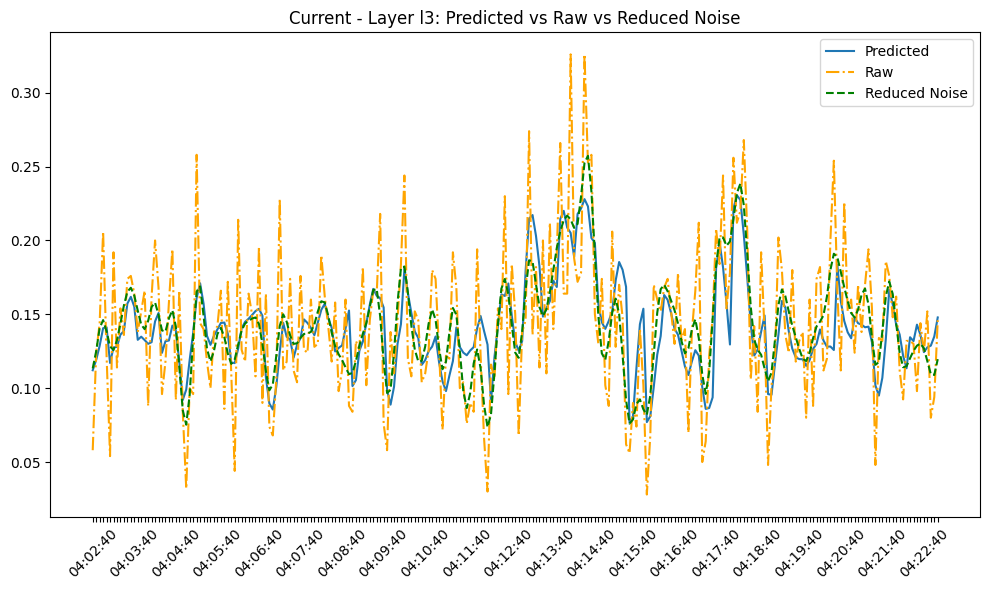

------------------


In [16]:
# Plot the data
header = (str(ARCHIVED) if ARCHIVED is not None else "Current") + " - "
header = header if SHOW_HEADER else ""

for key, df in dfs.items():
    # Plot the data
    fig, axes = plt.subplots(
        nrows=len(df.columns) - len(IGNORED_COLS),
        figsize=(10, 6 * (len(df.columns) - len(IGNORED_COLS))),
    )

    # Ensure axes is always a list or array
    if not isinstance(axes, np.ndarray):
        axes = [axes]

    ax_idx = 0  # Separate index for accessing axes

    for column in df.columns:
        if column not in IGNORED_COLS:
            actual_label = "Reduced Noise" if IS_FILTERED else "Raw"
            actual_color = "green" if IS_FILTERED else "orange"
            axes[ax_idx].plot(df.index, df[column], label=column)
            if IS_FILTERED:
                axes[ax_idx].plot(
                    df.index,
                    df["Raw"],
                    label="Raw",
                    linestyle="-.",
                    color="orange",
                )  # Added this line to plot the Raw values
            axes[ax_idx].plot(
                df.index,
                df["Actual"],
                label=actual_label,
                linestyle="--",
                color=actual_color,
            )

            # Sparse Tick Labels logic
            n = 12  # Display every n-th label
            for index, label in enumerate(axes[ax_idx].xaxis.get_ticklabels()):
                if index % n != 0:
                    label.set_visible(False)

            # Rotate the visible x-axis labels
            axes[ax_idx].tick_params(axis="x", rotation=45)

            axes[ax_idx].legend()
            # axes[ax_idx].grid(True) # Uncomment this line to show grid lines
            title = f"{header}Layer {key}: {column} vs Raw"
            if IS_FILTERED:
                title += " vs Reduced Noise"
            axes[ax_idx].set_title(title)
            ax_idx += 1  # Increment ax_idx

    plt.tight_layout()
    plt.show()
    print("------------------")